In [ ]:
# -*- coding: utf-8 -*-

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# 입력 값
X = np.array(range(1, 101))
print(X)

# 출력 값
y = 0.5*(X-50)**3 - 50000/X + 120000
print(y)



[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[ 11175.5         39704.          51421.83333333  58832.
  64437.5         69074.66666667  73103.64285714  76706.
  79983.94444444  83000.          85795.04545455  88397.33333333
  90827.34615385  93100.57142857  95229.16666667  97223.
  99090.32352941 100838.22222222 102472.92105263 104000.
 105424.54761905 106751.27272727 107984.58695652 109128.66666667
 110187.5        111164.92307692 112064.64814815 112890.28571429
 113645.36206897 114333.33333333 114957.59677419 115521.5
 116028.34848485 116481.41176471 116883.92857143 117239.11111111
 117550.14864865 117820.21052632 118052.4487179

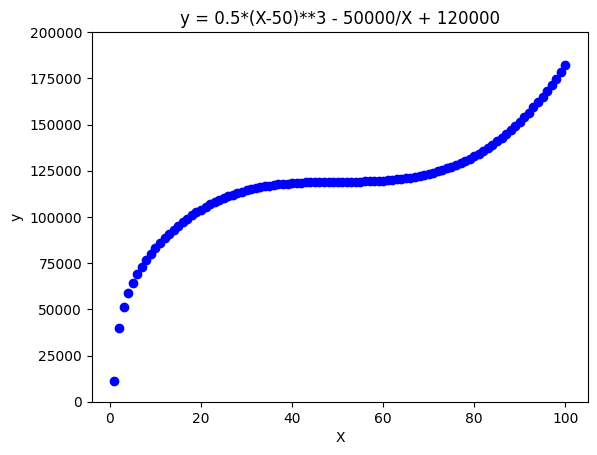

[  5  65  11  94  58  73  37   8  55  78  22  19  71  87  23   7  45   9
  42  17  46  21  26  56  79  32  93   6  85  33  53  14  92  18  29  47
  61  15  66  13  20   3   4   1  12  68  98  35  38  96  51 100  74  81
  70  59  91  90  44  31  27  24  50  16  25  77  54  39  84  48]
[41 36 82 62 99 69 86 28 40 43 34 60 64 95 57 88 97  2 72 83 10 52 30 89
 76 75 63 67 80 49]
[ 64437.5        120918.26923077  85795.04545455 162060.08510638
 119393.93103448 125398.56849315 117550.14864865  76706.
 119153.40909091 130334.97435897 106751.27272727 102472.92105263
 123926.27464789 144751.78735632 107984.58695652  73103.64285714
 118826.38888889  79983.94444444 118553.52380952  99090.32352941
 118881.04347826 105424.54761905 111164.92307692 119215.14285714
 131561.58860759 115521.5        159215.8655914   69074.66666667
 140849.26470588 116028.34848485 119070.10377358  93100.57142857
 156500.52173913 100838.22222222 113645.36206897 118922.67021277
 119845.82786885  95229.16666667 121290.42424

In [ ]:
# 산포도
plt.scatter(X, y, color ='b')
plt.title('y = 0.5*(X-50)**3 - 50000/X + 120000')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(0, 200000)
plt.show()

# 학습용과 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# 입력 데이터
print(X_train)
print(X_test)

# 출력 데이터
print(y_train)
print(y_test)


In [ ]:
# 데이터 구조의 차원 변형
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(X_train)

[[  5]
 [ 65]
 [ 11]
 [ 94]
 [ 58]
 [ 73]
 [ 37]
 [  8]
 [ 55]
 [ 78]
 [ 22]
 [ 19]
 [ 71]
 [ 87]
 [ 23]
 [  7]
 [ 45]
 [  9]
 [ 42]
 [ 17]
 [ 46]
 [ 21]
 [ 26]
 [ 56]
 [ 79]
 [ 32]
 [ 93]
 [  6]
 [ 85]
 [ 33]
 [ 53]
 [ 14]
 [ 92]
 [ 18]
 [ 29]
 [ 47]
 [ 61]
 [ 15]
 [ 66]
 [ 13]
 [ 20]
 [  3]
 [  4]
 [  1]
 [ 12]
 [ 68]
 [ 98]
 [ 35]
 [ 38]
 [ 96]
 [ 51]
 [100]
 [ 74]
 [ 81]
 [ 70]
 [ 59]
 [ 91]
 [ 90]
 [ 44]
 [ 31]
 [ 27]
 [ 24]
 [ 50]
 [ 16]
 [ 25]
 [ 77]
 [ 54]
 [ 39]
 [ 84]
 [ 48]]


In [ ]:
# 피쳐 스케일링: 학습 데이터의 입력 값
scalerX = MinMaxScaler()
scalerX.fit(X_train)
X_train_norm = scalerX.transform(X_train)

In [ ]:
# 피쳐 스케일링 : 학습 데이터의 출력 값
scalerY=MinMaxScaler()
scalerY.fit(y_train)
y_train_norm = scalerY.transform(y_train)

In [ ]:
# 피쳐 스케일링: 테스트 데이터의 입출력 값
X_test_norm = scalerX.transform(X_test)
y_test_norm = scalerY.transform(y_test)

In [ ]:
# 모형화
model = MLPRegressor(hidden_layer_sizes=(3,3),
                     activation = 'logistic',
                     solver='lbfgs',
                     max_iter=500)
# 학습
model.fit(X_train_norm, y_train_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=(3, 3), max_iter=500,
             solver='lbfgs')

In [ ]:
#예측
y_pred = model.predict(X_test_norm)
print(y_pred)
# 데이터 구조의 변형
y_pred = y_pred.reshape(-1,1)

[0.62982852 0.62619899 0.73364461 0.63319531 0.96822026 0.65058761
 0.77554206 0.60477374 0.62949544 0.63006508 0.62302936 0.63074486
 0.63665244 0.90004257 0.62864833 0.79960247 0.93320543 0.18701179
 0.66321471 0.74334753 0.40012146 0.62815906 0.61256204 0.81241389
 0.68583095 0.67951918 0.63478938 0.64402428 0.71575351 0.62885465]


In [ ]:
# 예측 값의 역변환
y_pred_inverse = scalerY.inverse_transform(y_pred)
print(y_pred_inverse)

[[118765.64123415]
 [118145.6295957 ]
 [136499.97420877]
 [119340.7726689 ]
 [176571.24242573]
 [122311.80294081]
 [143657.08512191]
 [114485.672222  ]
 [118708.74421026]
 [118806.05241073]
 [117604.17853199]
 [118922.17527291]
 [119931.3349992 ]
 [164924.82274264]
 [118564.03664861]
 [147767.1928643 ]
 [170589.85146388]
 [ 43121.69493792]
 [124468.82074081]
 [138157.47042421]
 [ 79526.04790437]
 [118480.45739374]
 [115816.10437213]
 [149955.69618425]
 [128332.22970402]
 [127254.02333161]
 [119613.078844  ]
 [121190.6258783 ]
 [133443.73602638]
 [118599.2805489 ]]


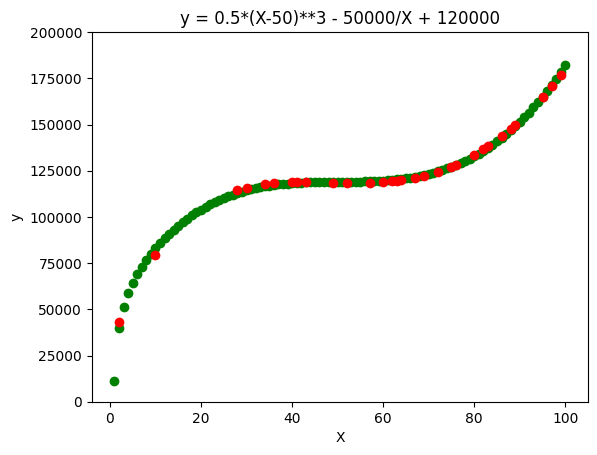

MAPE: 0.01


In [ ]:
# 산포도
# 원 데이터
plt.scatter(X, y, color ='g')
plt.title('y = 0.5*(X-50)**3 - 50000/X + 120000')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(0, 200000)
# 테스트 데이터
plt.scatter(X_test, y_pred_inverse, color ='r')
plt.show()

# 오차 측정(MAPE)
print('MAPE: %.2f' %
 mean_absolute_percentage_error(y_test, y_pred_inverse))